In [6]:
# to reload local packages when debugging
%load_ext autoreload
%autoreload 2

%cd /mnt/c/Users/resha/Documents/Github/balancing_framework/

import pickle
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# load data itself

with open('/mnt/c/Users/resha/Documents/Github/balancing_framework/spy5m_bintp_labelled.pkl', 'rb') as f:
    df_original = pickle.load(f)
with open('/mnt/c/Users/resha/Documents/Github/balancing_framework/spy5m_bintp004_episodes_fracdiff.pkl', 'rb') as f:
    df_fd = pickle.load(f)
with open('/mnt/c/Users/resha/Documents/Github/balancing_framework/spy5m_labelled_episodes_ta.pkl', 'rb') as f:
    df_ta = pickle.load(f)
    df_ta['label'] = df_original['tp_0.004'][df_ta.index]
# PZ algorithm has some look ahead so remove the episode labels, will be uesd only for some kind of analysis afterwards
# df = df_original.drop(columns=['episode']) 
df = df_original[["volume", "vwap", "open", "close", "high", "low", "transactions", "tp_0.004"]].rename(columns={"tp_0.004": "label"}) # 0.01 0.001
# df

# load results
results_dir = f'/mnt/c/Users/resha/Documents/Github/balancing_framework/results/chunk_size=10000 num_runs=2 sp500 random_forest'
with open(f'{results_dir}/adaptation_results_original.pkl', 'rb') as f:
    ada_original = pickle.load(f)
with open(f'{results_dir}/consolidation_results_original.pkl', 'rb') as f:
    cons_original = pickle.load(f)

with open(f'{results_dir}/adaptation_results_frac_diff.pkl', 'rb') as f:
    ada_fd = pickle.load(f)
with open(f'{results_dir}/consolidation_results_frac_diff.pkl', 'rb') as f:
    cons_fd = pickle.load(f)

with open(f'{results_dir}/adaptation_results_first_order_diff.pkl', 'rb') as f:
    ada_fod = pickle.load(f)
with open(f'{results_dir}/consolidation_results_first_order_diff.pkl', 'rb') as f:
    cons_fod = pickle.load(f)

with open(f'{results_dir}/adaptation_results_ta_original.pkl', 'rb') as f:
    ada_ta = pickle.load(f)
with open(f'{results_dir}/consolidation_results_ta_original.pkl', 'rb') as f:
    cons_ta = pickle.load(f)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/mnt/c/Users/resha/Documents/Github/balancing_framework


In [4]:
ada_original[0]

{'accuracy_mean': 0.706,
 'f1_mean': 0.6886128963838547,
 'accuracy_std': 0.009000000000000008,
 'f1_std': 0.007224883765558243,
 'time_training_seconds': 0.3847459625103511,
 'time_test_seconds': 0.02961573691572994,
 'model_name': 'random_forest',
 'last_ts': Timestamp('2003-12-03 18:45:00-0500', tz='America/New_York')}

In [62]:
def plot_changes(result_sets, metric, focused_form, title):
    plt.figure(figsize=(6, 4))  

    for result_set in result_sets:
        set_title = result_set[0]
        set_data = result_set[1]
        means1 = np.array([ x[f'{metric}_mean']*100 for x in set_data ])
        changes = np.diff(means1)
        timestamps1 = np.array([ x['last_ts'] for x in set_data ])[1:] # skip first to align with the diffs

        print(set_title)
        print(f'Average change: {np.mean(changes):.5g}, Highest change: {np.max(changes):.5g}, Lowest change: {np.min(changes):.5g}')

        if set_title == focused_form:
            sns.lineplot(x=timestamps1, y=changes, label=set_title, linewidth=2)
        else:
            sns.lineplot(x=timestamps1, y=changes, label=set_title, linewidth=0.5)

    plt.title(f'{title}: {metric}')
    plt.xlabel('Timestamp')
    plt.ylabel(f'{metric}')
    plt.legend()

    plt.tight_layout()  # adjust the layout to fit the figure size
    # plt.show()

def plot_metric(result_sets, metric, focused_form, title):
    plt.figure(figsize=(6, 4))  

    for result_set in result_sets:
        set_title = result_set[0]
        set_data = result_set[1]
        means1 = np.array([ x[f'{metric}_mean']*100 for x in set_data ])
        # std1 = np.array([ x[f'{metric}_std'] for x in set_data ])
        timestamps1 = np.array([ x['last_ts'] for x in set_data ])

        print(set_title)
        print(f'Average Value: {np.mean(means1):.5g}, Highest Value: {np.max(means1):.5g}, Lowest Value: {np.min(means1):.5g}')

        if set_title == focused_form:
            sns.lineplot(x=timestamps1, y=means1, label=set_title, linewidth=2)
        else:
            sns.lineplot(x=timestamps1, y=means1, label=set_title, linewidth=0.5)
        
        # plt.fill_between(timestamps1, means1 - std1, means1 + std1, alpha=0.3, label=f'{set_title} Std Dev')

    plt.title(f'{title}: {metric}')
    plt.xlabel('Timestamp')
    plt.ylabel(f'{metric}')
    plt.legend()

    plt.tight_layout()  # adjust the layout to fit the figure size
    # plt.show()


original
Average change: -0.069668, Highest change: 15.65, Lowest change: -15.55
first order differencing
Average change: -0.020065, Highest change: 19.6, Lowest change: -23
fractional differencing
Average change: -0.105, Highest change: 25.95, Lowest change: -24.6



original
Average Value: 67.876, Highest Value: 83.9, Lowest Value: 49.1
first order differencing
Average Value: 62.503, Highest Value: 81.8, Lowest Value: 49.35
fractional differencing
Average Value: 65.279, Highest Value: 84.85, Lowest Value: 50.65


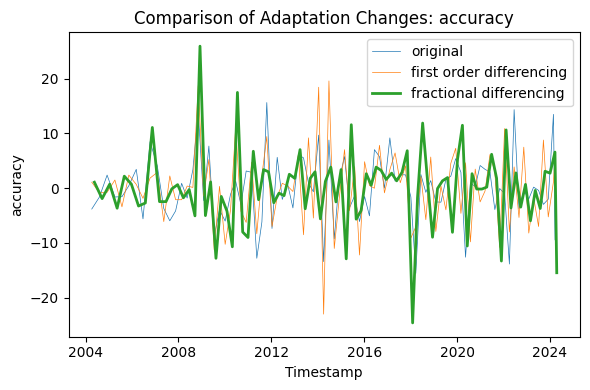

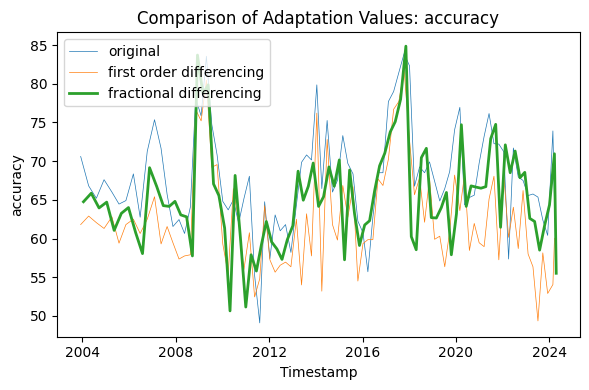

In [71]:
result_sets = [('original',ada_original), ('first order differencing', ada_fod), ('fractional differencing', ada_fd)]
metric = 'accuracy'
focused_form = 'fractional differencing'

plot_changes(result_sets, metric, focused_form, 'Comparison of Adaptation Changes')
print('\n\n')
plot_metric(result_sets, metric, focused_form, 'Comparison of Adaptation Values')

original
Average change: 0.041943, Highest change: 7.7609, Lowest change: -8.0036
first order differencing
Average change: -0.0073667, Highest change: 2.9229, Lowest change: -3.8717
fractional differencing
Average change: 0.021383, Highest change: 5.67, Lowest change: -6.3361



original
Average Value: 64.038, Highest Value: 66.504, Lowest Value: 58.233
first order differencing
Average Value: 60.414, Highest Value: 62.53, Lowest Value: 57.842
fractional differencing
Average Value: 62.513, Highest Value: 65.225, Lowest Value: 57.048


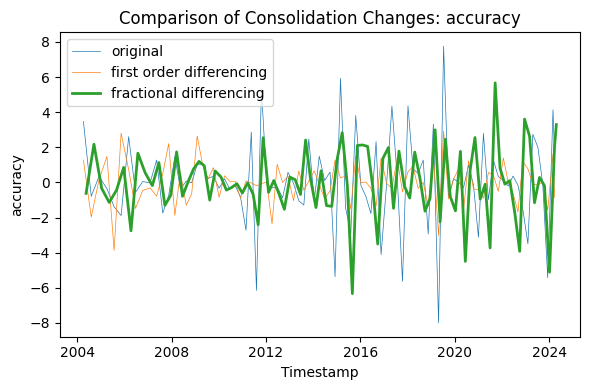

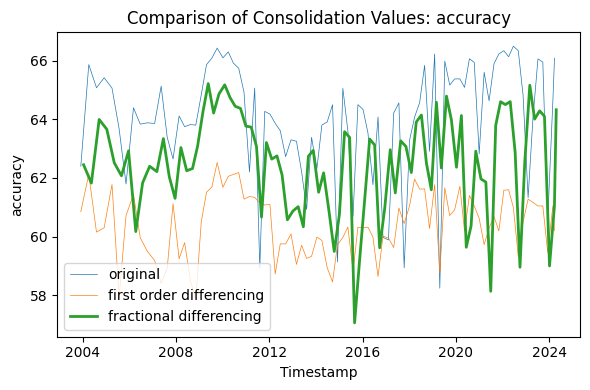

In [72]:
result_sets = [('original',cons_original), ('first order differencing', cons_fod), ('fractional differencing', cons_fd)]
metric = 'accuracy'
focused_form = 'fractional differencing'

plot_changes(result_sets, metric, focused_form, 'Comparison of Consolidation Changes')
print('\n\n')
plot_metric(result_sets, metric, focused_form, 'Comparison of Consolidation Values')

ta original
Average change: 0.045679, Highest change: 41.55, Lowest change: -40.4



ta original
Average Value: 95.053, Highest Value: 100, Lowest Value: 57.25


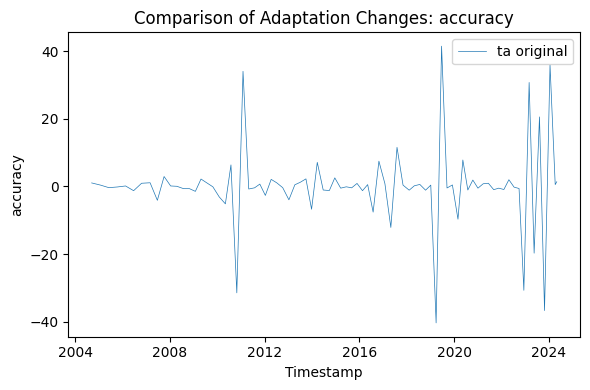

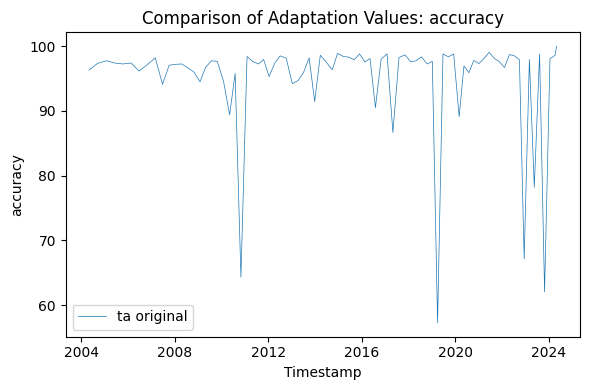

In [67]:
result_sets = [('ta original', ada_ta)]
metric = 'accuracy'
focused_form = 'fractional differencing'

plot_changes(result_sets, metric, focused_form, 'Comparison of Adaptation Changes')
print('\n\n')
plot_metric(result_sets, metric, focused_form, 'Comparison of Adaptation Values')

ta original
Average change: 0.0299, Highest change: 37.151, Lowest change: -36.962



ta original
Average Value: 93.717, Highest Value: 97.931, Lowest Value: 60.583


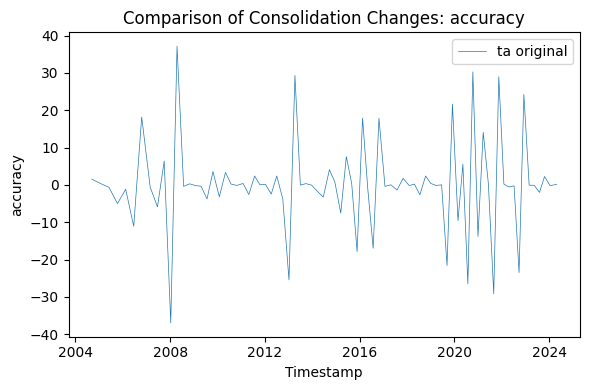

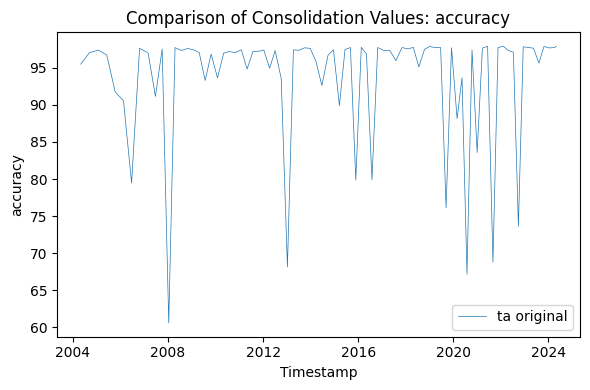

In [68]:
result_sets = [('ta original', cons_ta)]
metric = 'accuracy'
focused_form = 'fractional differencing'

plot_changes(result_sets, metric, focused_form, 'Comparison of Consolidation Changes')
print('\n\n')
plot_metric(result_sets, metric, focused_form, 'Comparison of Consolidation Values')

In [80]:
df_diff = df_ta.drop(['volume', 'transactions', 'label'], axis=1).diff()
df_diff = df_diff.join(df_ta[['volume', 'transactions', 'label']]).dropna()
df_diff

,vwap,open,close,high,low,rsi_28,stoch_k_14_3_3_28,stoch_d_14_3_3_28,ao_28,macd_28,...,volatility_ratio_2880,racc_close_2880,racc_close_5760,racc_close_8640,aqr_momo_close_2880,aqr_momo_close_5760,aqr_momo_close_8640,volume,transactions,label
timestamp,,,,,,,,,,,,,,,,,,,,,
2004-01-21 14:45:00-05:00,0.1113,0.0800,0.1200,0.1300,0.05,2.749193,11.158093,-0.010864,-0.009235,0.008499,...,-5.615576e-07,-1.578990e-07,6.367290e-09,-5.142510e-08,0.000007,8.335077e-06,4.497140e-06,1790300.0,474,1
2004-01-21 14:50:00-05:00,0.1372,0.1400,0.1300,0.1400,0.22,2.682058,15.416200,9.420267,0.016735,0.015820,...,-9.048246e-07,-7.685263e-08,-2.164934e-09,-7.220241e-09,0.000006,4.835172e-06,4.125686e-06,524200.0,394,1
2004-01-21 14:55:00-05:00,0.0588,0.1000,-0.0200,-0.0100,0.12,-0.705118,-0.371496,8.734266,0.033706,0.009410,...,2.618841e-08,2.215821e-07,1.035584e-07,8.355067e-08,0.000001,9.144204e-06,-1.810241e-06,165900.0,265,1
2004-01-21 15:00:00-05:00,-0.0298,-0.0300,-0.0200,0.0300,-0.29,-0.715050,-4.102247,3.647486,0.018676,0.004281,...,1.045070e-06,-7.775566e-08,-2.459313e-07,-2.818926e-17,0.000016,3.041782e-06,-9.101176e-07,281000.0,235,1
2004-01-21 15:05:00-05:00,0.0393,-0.0100,0.0200,0.0000,0.27,0.430234,-2.634245,-2.369329,0.042765,0.003404,...,-1.735139e-07,-3.339532e-07,-3.457660e-08,4.165950e-09,-0.000004,-3.913722e-07,1.560825e-06,172600.0,231,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30 19:35:00-04:00,-0.0996,-0.2300,-0.0400,-0.1700,-0.07,-0.308016,-18.187899,-19.663354,-0.084618,-0.011415,...,-1.331615e-07,-3.486481e-08,-2.906114e-09,-2.123419e-08,0.000018,-6.590644e-06,-9.408226e-07,4929.0,71,0
2024-04-30 19:40:00-04:00,0.1010,0.0201,0.1882,0.1182,0.06,2.249368,-4.890539,-16.394285,-0.060036,0.007237,...,-4.167510e-07,-2.179353e-07,-1.171351e-07,1.397798e-08,0.000011,-3.517202e-06,-4.676261e-06,10401.0,93,0
2024-04-30 19:45:00-04:00,0.1579,0.2099,0.0818,0.1118,0.20,0.960561,17.241379,-1.945686,-0.011304,0.013281,...,-3.087562e-07,-1.064945e-07,-5.592328e-08,1.717681e-09,-0.000008,5.199132e-07,-4.483814e-05,3686.0,62,0
